# **ANALYSING AGGREGATED DATA**


In [52]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
!pip install SQLAlchemy pymysql

In [54]:
!pip install -U kaleido

In [55]:
from sqlalchemy import create_engine

username = 'root'
password = '1234'
host = 'localhost'
database = 'phonepe'


engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

# SQL query
query = """
SELECT state, year, SUM(user_count) AS total_users
FROM aggregated_user
GROUP BY state, year
ORDER BY total_users DESC;
"""

# Read into pandas
df_users = pd.read_sql(query, engine)


In [56]:
df_users.head()

,state,year,total_users
0,Maharashtra,2021,164805957.0
1,Uttar Pradesh,2021,131903506.0
2,Maharashtra,2020,120775620.0
3,Karnataka,2021,106920722.0
4,Uttar Pradesh,2020,94722025.0


In [57]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",       
    password="1234",  
    database="phonepe"
)


query = "SELECT * FROM aggregated_transaction"
df_transactions = pd.read_sql(query, conn)
print("Aggregated Transaction Data:")
print(df_transactions.head())




Aggregated Transaction Data:
   year  quarter                      state          transaction_type  \
0  2018        1  Andaman & Nicobar Islands  Recharge & bill payments   
1  2018        1  Andaman & Nicobar Islands     Peer-to-peer payments   
2  2018        1  Andaman & Nicobar Islands         Merchant payments   
3  2018        1  Andaman & Nicobar Islands        Financial Services   
4  2018        1  Andaman & Nicobar Islands                    Others   

   transaction_count  transaction_amount  
0               4200           1845310.0  
1               1871          12138700.0  
2                298            452507.0  
3                 33             10601.4  
4                256            184690.0  


C:\Users\sharan\AppData\Local\Temp\ipykernel_33000\232062988.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(query, conn)


In [58]:
df_transactions= pd.read_sql(query, engine)
df_transactions.head()

,year,quarter,state,transaction_type,transaction_count,transaction_amount
0,2018,1,Andaman & Nicobar Islands,Recharge & bill payments,4200,1845310.0
1,2018,1,Andaman & Nicobar Islands,Peer-to-peer payments,1871,12138700.0
2,2018,1,Andaman & Nicobar Islands,Merchant payments,298,452507.0
3,2018,1,Andaman & Nicobar Islands,Financial Services,33,10601.4
4,2018,1,Andaman & Nicobar Islands,Others,256,184690.0


In [59]:
query = "SELECT COUNT(*) FROM aggregated_insurance;"
df_insurance = pd.read_sql(query, conn)
print("Aggregated Insurance Data:")
print(df_insurance.head())


Aggregated Insurance Data:
   COUNT(*)
0       682


C:\Users\sharan\AppData\Local\Temp\ipykernel_33000\813504630.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_insurance = pd.read_sql(query, conn)


## 1. Total PhonePe Users by State and Year

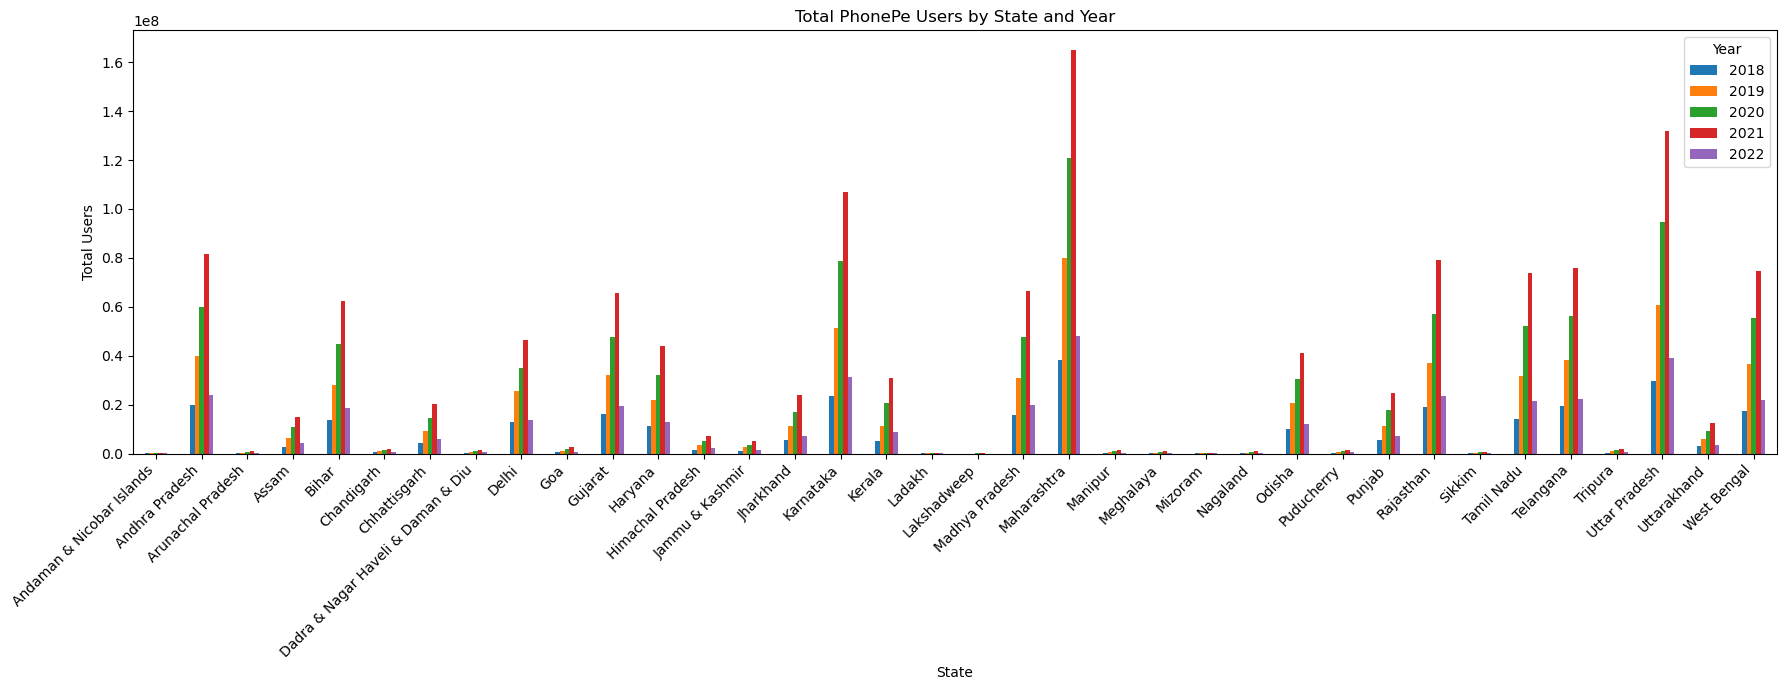

In [61]:
# Pivot the data so states are rows and years are columns, values are total_users
df_pivot = df_users.pivot(index='state', columns='year', values='total_users').fillna(0)
ax = df_pivot.plot(kind='bar', figsize=(18,7))
plt.title('Total PhonePe Users by State and Year')
plt.xlabel('State')
plt.ylabel('Total Users')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/total_phonepe_users_matplotlib.png", dpi=300)
plt.show()

### Insight: 
- Clear growth trend from 2018 to 2021 across almost all states.
- States like Maharashtra, Uttar Pradesh, Karnataka, Telangana, and Andhra Pradesh dominate in user numbers.
- The growth slows down or plateaus in 2022 for most states — this could either reflect market saturation, reporting lag, or data issues.

## 2. Year-wise Total PhonePe Users in India

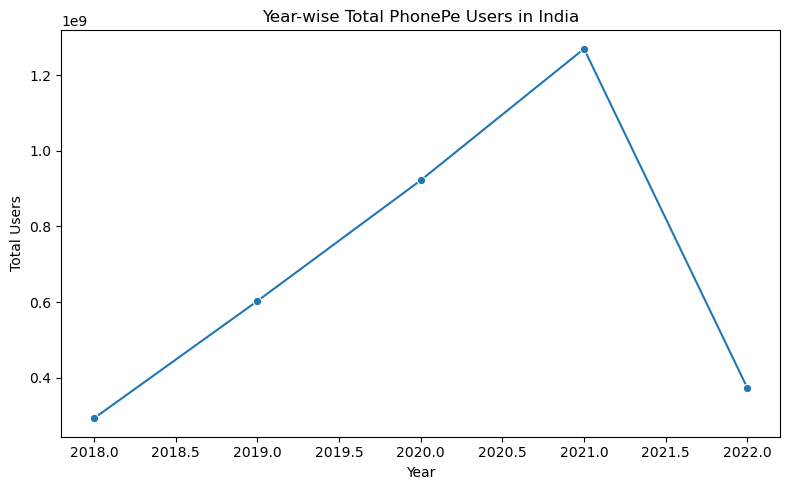

In [64]:
# Grouping data
yearly_users = df_users.groupby('year')['total_users'].sum().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=yearly_users, x='year', y='total_users', marker='o', ax=ax)
ax.set_title('Year-wise Total PhonePe Users in India')
ax.set_ylabel('Total Users')
ax.set_xlabel('Year')
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/yearwise_total_users.png", dpi=300)
plt.show()


### Insights: 
- Steady growth from 2018 to 2021.
- Surprising sharp drop in 2022 — this is highly unusual and likely due to:
    - Data/reporting error
    - Change in metric definition
- Worth rechecking this data source, as such a massive decline doesn't align with market trends.

## 3. State-wise Total PhonePe Users in 2022

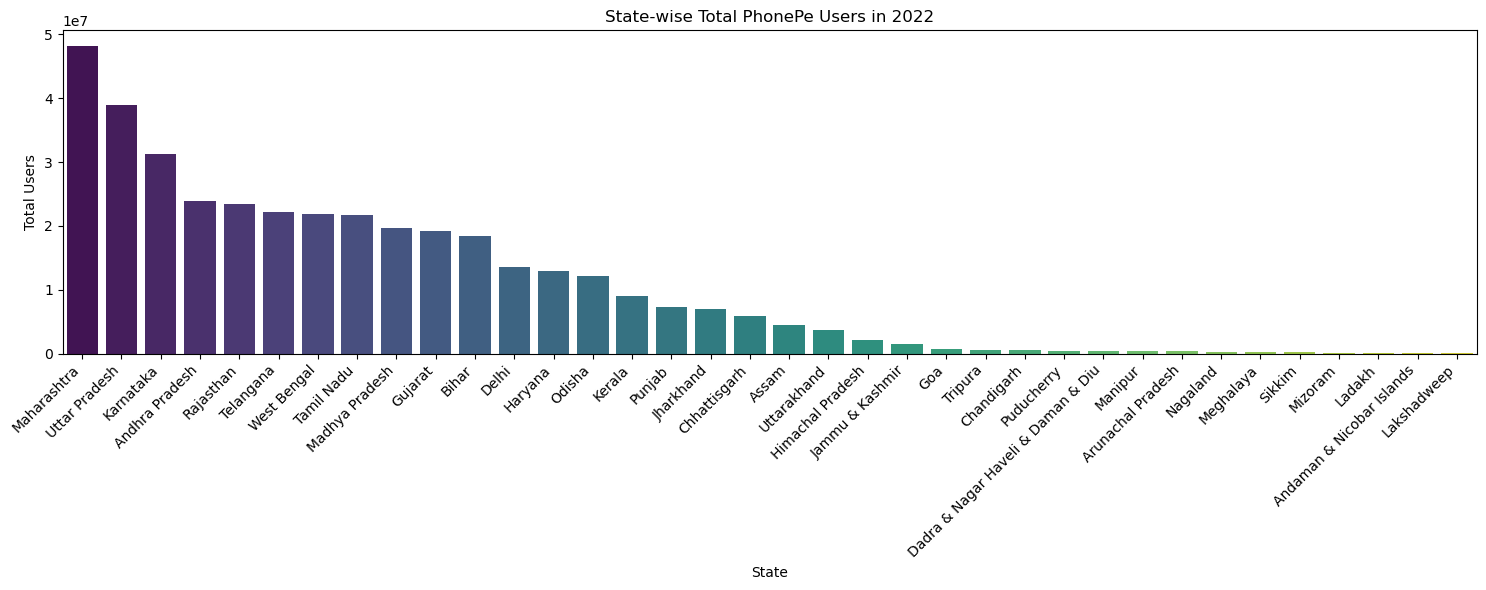

In [67]:
selected_year = 2022
state_year_data = df_users[df_users['year'] == selected_year].sort_values(by='total_users', ascending=False)

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(data=state_year_data, x='state', y='total_users', hue='state', palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title(f'State-wise Total PhonePe Users in {selected_year}')
plt.xlabel('State')
plt.ylabel('Total Users')
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/statewise_users_selected_year.png", dpi=300)
plt.show()


### Insights:
- Maharashtra leads in user base, followed by Uttar Pradesh, Karnataka, and Andhra Pradesh.
- Unlike the transaction amount, Telangana is not in the top 3 for users, despite leading transactions.
- Small states/UTs like Sikkim, Mizoram, Ladakh having minimal users.
- Therefore, high user base does not always translate to higher transaction amounts 

In [114]:
query = "SELECT * FROM aggregated_transaction"
df_transactions = pd.read_sql(query, conn)
print("Aggregated Transaction Data:")
print(df_transactions.head())

Aggregated Transaction Data:
   year  quarter                      state          transaction_type  \
0  2018        1  Andaman & Nicobar Islands  Recharge & bill payments   
1  2018        1  Andaman & Nicobar Islands     Peer-to-peer payments   
2  2018        1  Andaman & Nicobar Islands         Merchant payments   
3  2018        1  Andaman & Nicobar Islands        Financial Services   
4  2018        1  Andaman & Nicobar Islands                    Others   

   transaction_count  transaction_amount  
0               4200           1845310.0  
1               1871          12138700.0  
2                298            452507.0  
3                 33             10601.4  
4                256            184690.0  


C:\Users\sharan\AppData\Local\Temp\ipykernel_33000\701680635.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(query, conn)


## 4. Total Transaction Amount by State

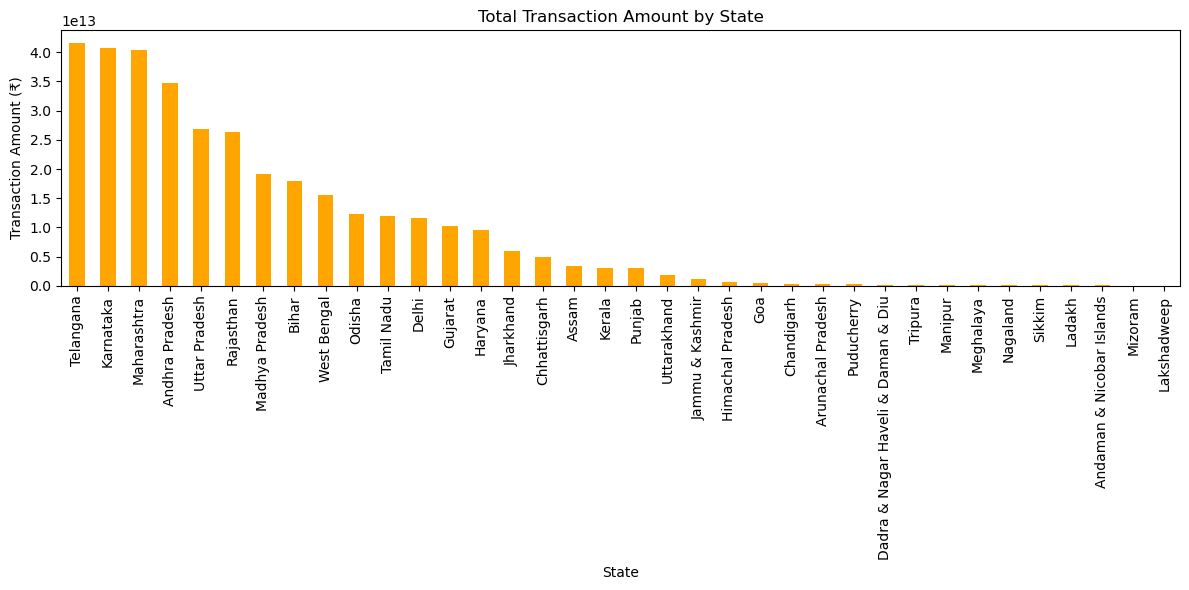

In [71]:
# Group by state and sum transaction amount
df_txn_sum = df_transactions.groupby('state')['transaction_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
df_txn_sum.plot(kind='bar', color='orange')
plt.title("Total Transaction Amount by State")
plt.xlabel("State")
plt.ylabel("Transaction Amount (₹)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/total_transaction_by_state.png", dpi=300)
plt.show()


### Insight: 
- Telangana tops transaction amounts by a narrow margin, followed closely by Karnataka and Maharashtra.
- After these leaders, there is a sharp drop — Andhra Pradesh, UP, and Rajasthan follow at a distance.
- Again, smaller states/UTs like Lakshadweep, Mizoram, Sikkim see minimal volumes.
- Concentration of transactions is high — few states drive the bulk of digital payments.

In [73]:
print(df_users.columns)
print(df_pivot.columns)
print(state_year_data.columns)
print(yearly_users.columns)


Index(['state', 'year', 'total_users'], dtype='object')
Index([2018, 2019, 2020, 2021, 2022], dtype='int64', name='year')
Index(['state', 'year', 'total_users'], dtype='object')
Index(['year', 'total_users'], dtype='object')


## 5. State-wise Transaction Amount in 2022

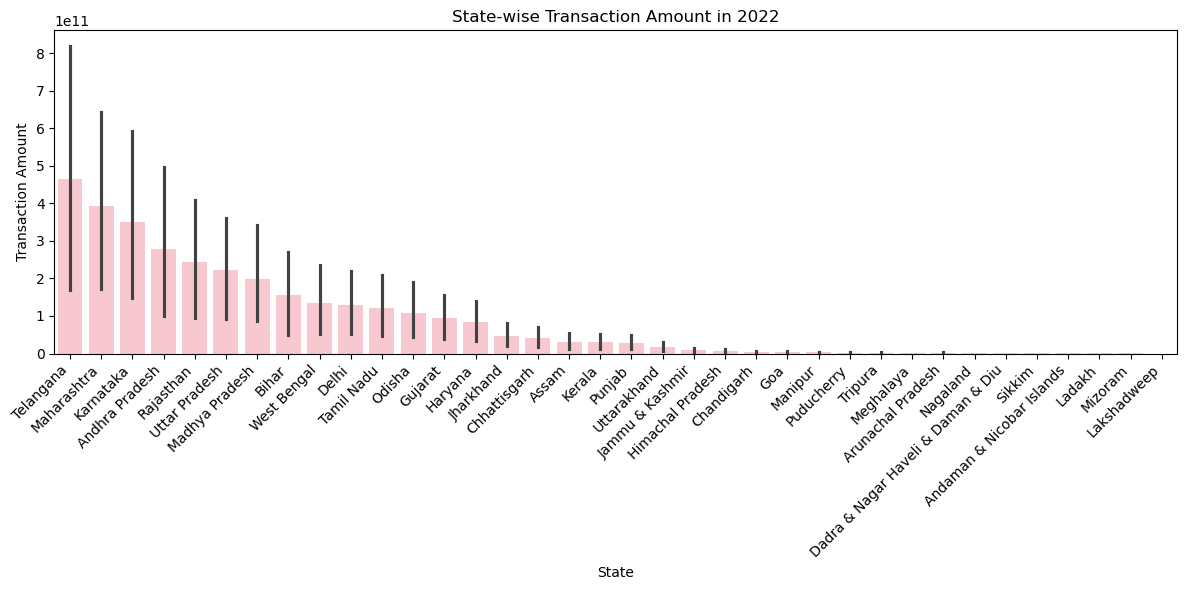

In [75]:
selected_year = 2022  
state_trans_data = df_transactions[ df_transactions['year'] == selected_year].sort_values(by='transaction_amount', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=state_trans_data, x='state', y='transaction_amount', color='pink')
plt.xticks(rotation=45, ha='right')
plt.title(f'State-wise Transaction Amount in {selected_year}')
plt.xlabel('State')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/statewise_transaction_amount.png", dpi=300)
plt.show()


### Insights: 
- Telangana tops the transaction amount by a significant margin, followed by Maharashtra, Karnataka, and Andhra Pradesh.
- States like Lakshadweep, Mizoram, Sikkim are at the bottom, with very low transaction volumes.
- This implies that transaction activity is concentrated heavily in a few states, likely driven by population, economic activity, and digital adoption.

In [77]:
query = "SELECT * FROM aggregated_insurance LIMIT 5;"
df_insurance = pd.read_sql(query, conn)
print(df_insurance.columns)
print(df_insurance.head())


print(df_insurance['insurance_type'].unique())
print(df_insurance.groupby('insurance_type')['insurance_count'].sum())


Index(['year', 'quarter', 'state', 'insurance_type', 'insurance_count',
       'insurance_amount'],
      dtype='object')
   year  quarter                      state insurance_type  insurance_count  \
0  2020        2  andaman-&-nicobar-islands          TOTAL                6   
1  2020        3  andaman-&-nicobar-islands          TOTAL               41   
2  2020        4  andaman-&-nicobar-islands          TOTAL              124   
3  2021        1  andaman-&-nicobar-islands          TOTAL              225   
4  2021        2  andaman-&-nicobar-islands          TOTAL              137   

   insurance_amount  
0            1360.0  
1           15380.0  
2          157975.0  
3          244266.0  
4          181504.0  
['TOTAL']
insurance_type
TOTAL    533
Name: insurance_count, dtype: int64


C:\Users\sharan\AppData\Local\Temp\ipykernel_33000\384221513.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_insurance = pd.read_sql(query, conn)


## 6. Year-wise Total Insurance Counts

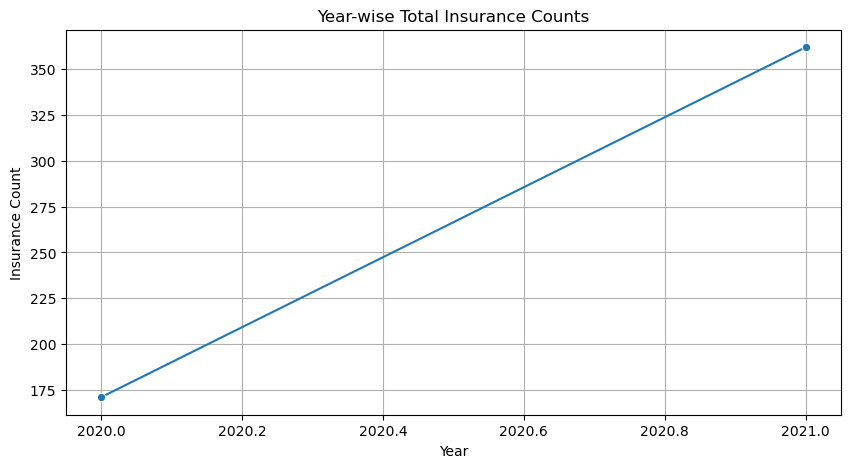

In [79]:
# Group by year and sum counts (only one insurance_type: TOTAL)
ins_by_year = df_insurance.groupby('year')['insurance_count'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=ins_by_year, x='year', y='insurance_count', marker='o')
plt.title('Year-wise Total Insurance Counts')
plt.xlabel('Year')
plt.ylabel('Insurance Count')
plt.grid(True)
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/year_wise_total_insurance_counts.png", dpi=300)
plt.show()


### Insights: 
- Insurance counts show strong growth from 2020 to 2021 — from about 170 to 360+.
- Indicates rising adoption or reporting of insurance products over time.

## 7. State-wise Insurance Count in 2021

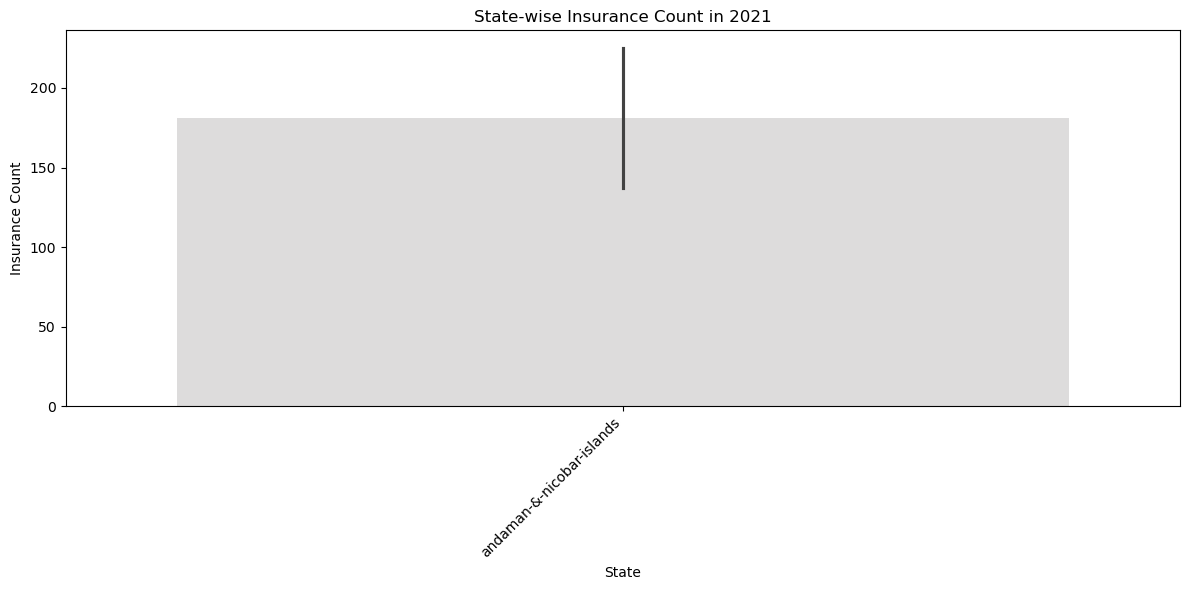

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_year = 2021 
state_insurance_data = df_insurance[df_insurance['year'] == selected_year].sort_values(by='insurance_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=state_insurance_data, x='state', y='insurance_count', hue='state', palette='coolwarm', dodge=False, legend=False)
plt.xticks(rotation=45, ha='right')
plt.title(f'State-wise Insurance Count in {selected_year}')
plt.xlabel('State')
plt.ylabel('Insurance Count')
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/statewise_insurance_count.png", dpi=300)
plt.show()


## Insights: 
- The graph shows data only for Andaman & Nicobar Islands with an insurance count around 180. There's a large error bar, suggesting either high variance or data uncertainty.
- The data might be incomplete (only one state shown).


## 8. Correlation: Transaction Amount vs User Count

Correlation Matrix:
                    transaction_amount  total_users
transaction_amount            1.000000     0.246518
total_users                   0.246518     1.000000


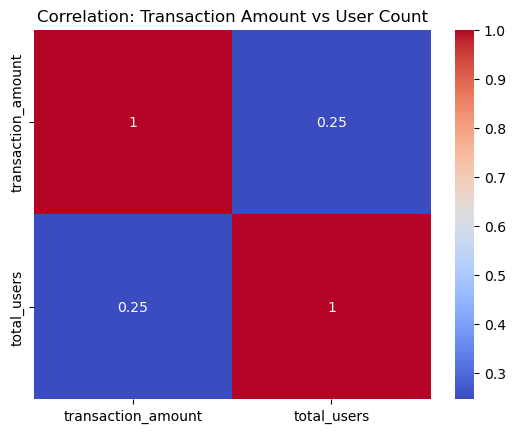

In [85]:
# Merge the two dataframes on state, year, quarter
merged_df = pd.merge(df_transactions, df_users, on=["state", "year"])

# Calculate correlation matrix between transaction_amount and user_count
correlation_matrix = merged_df[['transaction_amount', 'total_users']].corr()

# Print the matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Show heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation: Transaction Amount vs User Count")
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/correlation_amount_vs_count.png", dpi=300)

plt.show()


### Insights: 
- The correlation coefficient between transaction amount and user count is only 0.25.
- This shows a weak positive relationship — more users doesn’t necessarily mean proportionally higher transaction volumes.
- Some states likely have high-value users (few users, large transactions) while others have many users transacting smaller amounts.

## FINAL TAKEAWAY:
- Digital payment adoption in India has grown rapidly but unevenly across states.
- A few states drive the majority of both user numbers and transaction amounts.
- Insurance services are beginning to see increased digital adoption.
- To fully understand regional performance, it will be important to consider not just user growth but also transaction engagement and value per user.